<a href="https://colab.research.google.com/github/hufsaim/T10402201/blob/master/notebook/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# Data

In [2]:
d = pd.read_excel('data0327.xlsx')
X = torch.tensor(d.iloc[:,:-1].to_numpy()).to(torch.float32) # input
y = torch.tensor(d.iloc[:,-1].to_numpy()).to(torch.float32) # label
X_vd = X.clone() # 실제 학습에서는 X에 포함되지 않는 새로운 데이터를 넣자.
y_vd = y.clone()
print(X.shape)

torch.Size([33, 4])


In [3]:
# data loader
def data_iter(data, label, batch_size):
  N,num_features = data.shape
  inds = list(range(N))
  random.shuffle(inds)
  for i in range(0,N,batch_size):
    batch_inds = inds[i:min(i+batch_size, N)]
    batch_data = data[batch_inds,:]
    batch_label = label[batch_inds]
    yield batch_data, batch_label

# Model

In [4]:
# model
def linreg(X, w, b):
    return torch.matmul(X,w) + b

In [5]:
# Model parameters
w = torch.tensor([1.,1,1,1.], requires_grad = True)
b = torch.tensor(1., requires_grad = True)

# Objective Function

In [6]:
# loss function
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

# Algorithm

In [7]:
# algorithm for model's parameter update
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad/batch_size
            param.grad.zero_()

In [8]:
# Model parameters
w = torch.tensor([1.,1,1,1.], requires_grad = True)
b = torch.tensor(1., requires_grad = True)

# Hyper parameters
batch_size = 33
lr = 0.001

# Train

In [9]:
num_epoch = 15
loss_valid_epoch = []
loss_valid_step = []
# loop for learning
for j in np.arange(0,num_epoch):
  mydata_iter = data_iter(X,y,batch_size)
  for batch_X,batch_y in mydata_iter:
    y_hat = linreg(batch_X,w,b)         # 1. forward
    l = squared_loss(y_hat, batch_y)    # 2. loss calculation
    l.sum().backward()                  # 3. backward
    sgd([w,b],lr,batch_size)            # 4. parameter update
    loss_valid_step.append(l.sum().detach()/len(batch_X))

  y_vd_hat = linreg(X_vd,w,b)
  l_all = squared_loss(y_vd_hat,y_vd)
  loss_valid_epoch.append(l_all.sum().detach()/len(X_vd))

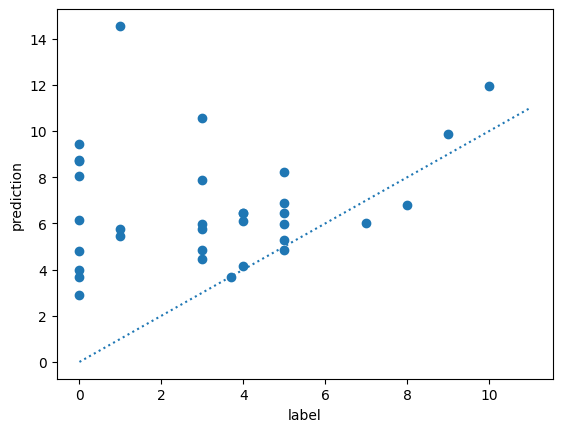

In [11]:
plt.scatter(y,y_vd_hat.detach().numpy())
plt.plot(np.arange(0,12),np.arange(0,12),':')
plt.xlabel('label')
plt.ylabel('prediction')
plt.show()

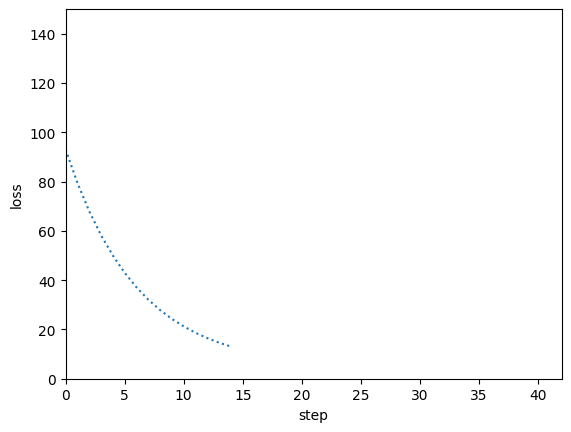

In [12]:
plt.plot(loss_valid_step[:42],':')
plt.xlabel('step')
plt.ylabel('loss')
plt.axis([0,42,0,150])
plt.show()

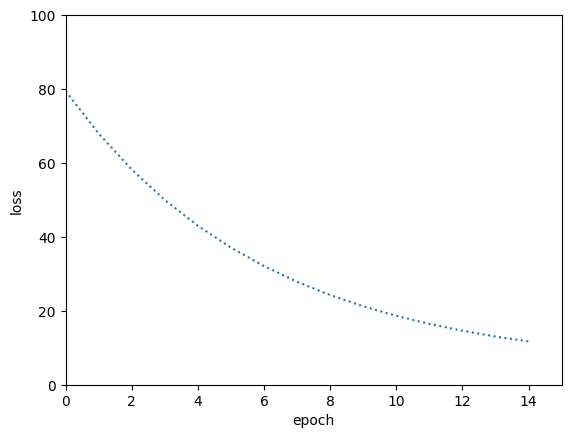

In [13]:
plt.plot(loss_valid_epoch[:15],':')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.axis([0,15,0,100])
plt.show()